# 02. 사이킷런으로 시작하는 머신러닝

## 1. 사이킷런 소개와 특징

- **사이킷런** 

파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리  
파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공

- **사이킷런의 특징**

1. 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공


2. 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공


  
3. 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리

In [2]:
import sklearn

print(sklearn.__version__)

1.0.2


## 2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

- **분류(classification)** : 대표적인 지도학습(Supervised Learning) 방법의 하나


- **지도학습** : 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
 + 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측


**sklearn.datasets** : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임  
**sklearn.tree** : 트리 기반 ML 알고리즘을 구현한 클래스의 모임  
**sklearn.model_selection** : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임

- + 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭, 이를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있음.

In [4]:
# Iris 데이터를 불러온다
from sklearn.datasets import load_iris

# 의사결정 트리 알고리즘(Decision Tree)을 불러온다
from sklearn.tree import DecisionTreeClassifier

# 데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 함수를 불러온다
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다. 
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

# 레이블(Label, 결정값)은 0이 Setosa 품종, 1이 Versicolor 품종, 2가 virginica 품종

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**train_test_split()** : 데이터를 학습 데이터와 테스트 데이터로 분리한다
- + 학습 데이터 세트 : 학습을 위해 주어진 데이터 세트
- + 테스트 데이터 세트 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트


- **test_size** : 전체 데이터 중 학습 데이터와 테스트 데이터를 입력값의 비율로 분할
- + test_size = 0.2 -> test 데이터가 20%, train 데이터가 80%

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
#iris_data - 피처 데이터 세트, iris_label - 레이블 데이터 세트
#random_state - 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값

In [11]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# DecisionTreeClassifier를 기반으로 학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

**fit(학습용 피처 데이터 속성, 결정값 데이터 세트)** - 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출하면 학습을 수행

**predict(테스트용 피처 데이터)** - 테스트용 피처 데이터를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환

In [14]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

정확도 : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표


**accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트)** - 정확도 측정 함수

In [15]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


**1. 데이터 세트 분리** : 데이터를 학습 데이터와 테스트 데이터로 분리한다 -> train_test_split()

**2. 모델 학습** : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습한다 -> .fit()

**3. 예측 수행** : 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측한다 -> .predict()

**4. 평가** : 예측된 결괏값과 테스트 데이터의 실제 값을 비교해 ML 모델 성능을 평가한다 -> accuracy_score()

## 3. 사이킷런의 기반 프레임워크 익히기

### Estimator 이해 및 fit( ), predict( ) 메서드

지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현한 사이킷런 클래스는 fit( ), predict( )만을 이용해 간단학게 학습과 예측 결과를 반환. 당연히 Estimator 클래스는 fit(), predict()를 내부에서 구현

비지도학습인 차원 축소, 클러스터링, 피처 추출 등을 구현한 클래스는 대부분 fit( ), transform( ) 적용.  
비지도학습과 피처 추출에서 fit( )은 지도학습의 fit( )과 같이 학습을 의미하는 것이 아니라, 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업.  
fit( )으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform( )으로 수행

**지도학습**


- **Estimator - 지도학습의 모든 알고리즘을 구현한 클래스를 통칭**
 + **Classifier** - 분류 알고리즘을 구현한 클래스
   * DecisionTreeClassifier
   * RandomForestClassifier
   * GradientBoostingClassifier
   * GaussianNB
   * SVC

 + **Regressor** - 회귀 알고리즘을 구현한 클래스
     * LinearRegression
     * Ridge
     * Lasso
     * RandomForestRegressor
     * GradientBoostingRegressor
 
**비지도학습**
- 차원 축소
- 클러스터링

**피처 추출(Feature Extraction)**

### 내장된 예제 데이터 세트

In [17]:
#붖꽃 데이터 세트 생성
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [18]:
# 사이킷런에 내장된 데이터 세트는 일반적으로 딕셔너리 형태로 되어 있다.
# 딕셔너리 형태이므로 Key 값이 존재한다
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [19]:
# 데이터 키 -> 피처들의 데이터
# 데이터 세트가 딕셔너리 형태이므로  피처 데이터 값 추출 위해 데이터 세트.data 또는 데이터 세트['data']를 이용
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

## 4. Model Selection 모듈 소개

- 사이킷런의 model_section 모듈은 학습 데이터와 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

### 학습/테스트 데이터 셋 분리 – train_test_split( )

학습 데이터와 테스트 데이터를 분리하지 않고 학습 데이터로만 학습, 예측하면 발생하는 문제 -> 정확도 100% bec. 이미 학습한 학습 데이터 세트 기반으로 예측했기 때문

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


=> 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터여야 한다. 사이킷런의 **train_test_split( )**를 통해 원본 데이터 세트에서 학습 및 테스트 데이터 세트를 쉽게 분리할 수 있다.

- **test_size** : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. 디폴트는 0.25

    
- **train_size** : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. test_size 파라미터를 통상저긍로 사용하기 때문에 train_size는 잘 사용되지 않는다.

    
- **shuffle** : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정한다. 디폴트는 True. 데이터를 분산시켜 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는데 사용한다.

    
- **random_state** : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값이다. train_test_split()는 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스터용 데이터를 생성한다.

    
- **train_test_split()** 의 반환값은 튜플 형태이다. 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환된다.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

# 테스트 데이터 세트를 전체 30%로, 학습 데이터 세트를 70%로 분리한다. random_state=121로 변경해 데이터 세트를 변화시켜 볼 것

In [4]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


학습용 데이터의 양을 일정 수준 이상 보장하는 것도 중요하지만, 학습된 모델에 대해 **다양한 데이터**를 기반으로 예측 성능을 평가해보는 것도 중요하다.

### 교차 검증

- 알고리즘을 학습시키는 학습 데이터와 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요하지만 이 방법 역시 **과적합(Overfitting)** 에 취약한 약점을 가질 수 있다.

**과적합(Overfitting)**
- 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
- 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생김
- 해당 테스트 데이터에만 과적합되는 학습 모델이 생성됨 ---> 교차 검증으로 문제점 개선!

**교차검증** - ML 알고리즘에서 나타나는 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것. 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다.

- 대부분 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용하여 평가하는 프로세스
- ML에 사용되는 데이터 세트를 세분화해서 **학습, 검증, 테스트 데이터 세트**로 나눌 수 있다.  
=> 테스트 데이터 세트 외의 별도의 검증 데이터 세트를 둬서(학습 데이터 세트에서 분할됨) 최종 평가 이전에 학습된 모델을 다양하게 평가하는데 사용

#### K 폴드 교차 검증

- 가장 보편적인 교차 검증 기법

- K개의 데이터 폴드 세트를 만들어서(데이터 세트를 K등분) K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
- K개의 예측 평가를 구했으면 이를 평균해서 K 폴드 평가 결과로 반영

사이킷런 라이브러리에서 K 폴드 교차 검증 프로세스를 구현하기 위해 KFold와 StratifiedKFold 클래스를 제공

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


생성된 KFold 객체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리  
전체 붓꽃 데이터는 150개이므로 학습용 데이터 세트는 4/5인 120개, 검증 테스트 데이터 세트는 1/5인 30개로 분할

In [10]:
n_iter = 0

# KFold객체의 split( )를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


#### Stratified K 폴드

- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
- + 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말한다.


=> Stratified K 폴드는 K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결. 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

In [11]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [12]:
kfold = KFold(n_splits=3)
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


**KFold의 문제점**
- 첫 번째 교차 검증에서는 학습 레이블의 1, 2 값이 각각 50개가 추출되었고 검증 레이블의 0 값이 50개 추출.
  + 학습 레이블은 1, 2 밖에 없으므로 0의 경우는 전혀 학습하지 못한다.
  + 반대로 검증 레이블은 0 밖에 없으므로 학습 모델은 전혀 0을 에측하지 못한다

In [17]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    
# 학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당됐음을 알 수 있음

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


- StarifiedKFold는 이렇게 KFold로 분할된 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해준다.  
- k-fold 교차 검증과 가장 큰 차이점은 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 매서드에 인자로 피처 데이터 세트 뿐만 아니라 레이블 데이터 세트도 반드시 필요

In [18]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)

# 반복 수
n_iter=0

cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index  in skfold.split(features, label):
    
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1   # 반복 수 + 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    # 평균 정확도 계산을 위한 리스트 객체에 정확도 저장
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


#### 교차 검증을 보다 간편하게 - cross_val_score( )

- 교차 검증을 보다 간편하게 하는 API

k 폴드의 데이터 학습, 예측 코드 
1. 폴드 세트를 설정
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
3. 반복적으로 학습과 예측을 수행하고 예측 성능 반환
- cross_val_score()은 이런 일련의 과정을 한번에 수행해주는 API이다.

선언 형태

- cross_val_score(estimator, X, y=none, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
- + 이 중 estimator, X, y, scoring, cv가 주요 파라미터
- + estimator : 분류 또는 회귀 의미
- + X : 피처 데이터 세트
- + y : 레이블 데이터 세트
- + scoring : 예측 성능 평가 지표 기술
- + cv : 교차 검증 폴드 수 의미

반환 값 : cv로 지정된 횟수만큼 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환. 일반적으로 이를 평균해 평가 수치로 사용.

비슷한 API로 cross_valdiate( )가 있음. cross_val_score()와 달리 여러 개의 평가 지표 반환 가능 + 학습 데이터에 대한 성능 평가 지표와 수행 시간 제공  
그러나 보통 cross_val_score() 하나로도 대부분의 경우 쉽게 사용.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV : 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

- 사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor과 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공 (Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식)

- **estimator** : classifier, regressor, pipeline이 사용될 수 있다.


- **param_grid** : key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정한다.


- **scoring** : 예측 성능을 측정할 평가 방법을 지정한다.


- **cv** : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정한다.


- **refit** : default=True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

In [22]:
grid_parameters = {'max_depth' : [1,2,3],
                  'min_samples_split' : [2,3]
                  }

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### DecisionTreeClassifier의 중요 하이퍼 파라미터들을 딕셔너리 형태로 설정 -> 최적 하이퍼 파라미터를 찾기 위해서
parameters = {'max_depth':[1,2,3,4,5], 'min_samples_split':[2,3]}

In [24]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재학습 시킴 
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,9,0.700,0.7,0.700
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,9,0.700,0.7,0.700
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,4,0.925,1.0,0.950
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,4,0.925,1.0,0.950
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.950
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.950
6,"{'max_depth': 4, 'min_samples_split': 2}",0.950000,7,0.925,1.0,0.925
7,"{'max_depth': 4, 'min_samples_split': 3}",0.966667,3,0.975,1.0,0.925
8,"{'max_depth': 5, 'min_samples_split': 2}",0.958333,4,0.950,1.0,0.925
9,"{'max_depth': 5, 'min_samples_split': 3}",0.950000,7,0.925,1.0,0.925


- params 칼럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터값을 나타냄.
- rank_test_score는 하이퍼 파라미터별로 성능이 좋은 score순위, 1이 가장 뛰어난 순위이며 이때의 파라미터가 최적의 하이퍼 파라미터
- mean_test_score는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

- fit()를 수행하면 최고 성능을 가진 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_속성에 기록됨. (cv_results_의 rank_test_score가 1일 때의 값)

In [25]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [26]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator=grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred=estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


## 5. 데이터 전처리

- 사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 사항이 있는데 결손값, 즉, NaN, Null 값은 허용되지 않아 고정된 다른 값으로 변환해야 한다.


- 피처 값들 중 Null 값이 얼마 되지 않는 경우 피처의 평균값 등으로 간단히 대체할 수 있지만 Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 더 좋다. 다만 중요도가 높은 피처이고 Null을 단순히 피처 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 더 정밀한 대체 값을 선정해야 함.


- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않는다. 그래서 모든 문자열을 인코딩해서 숫자형으로 변환해야 한다.
  + 문자열 피처 : 카테고리 피처, 텍스트형 피처

### 데이터 인코딩

- 대표적으로 **레이블 인코딩, 원-핫 인코딩** 방식 존재

**레이블 인코딩(Label encoding)** 


: 카테고리의 피처를 코드형 숫자값으로 변환하는 것

- ex) TV : 1, 냉장고 : 2, 전자레인지 : 3, ... 문자열을 숫자 값으로 변환


- LabelEncoder 클래스로 구현. LabelEncoder를 객체로 생성 후 fit(), transform()을 호출해 레이블 인코딩 수행

In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


문자열이 어떤 숫자 값으로 인코딩됐는지 확인하려면? 
- LabelEncoder 객체의 **class_** 속성값으로 확인하면 된다.

In [2]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


**inverse_transform()**을 통해 인코딩된 값을 다시 디코딩 가능

In [3]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


 - 다만 레이블 인코딩은 일괄적으로 숫자 값으로 변환되면서 몇몇 ML 알고리즘에서는 예측 성능이 떨어지는 경우가 발생 가능
   + bec. 숫자 값의 크고 작음에 대한 특성이 작용하기 때문

- ex) 냉장고 1, 믹서 2로 변환되면, 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성 발생 (이들의 숫자 변환값은 단순 코드이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안된다!).  
다만 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩을해도 큰 문제가 되지 않는다

-> 원-핫 인코딩(One-Hot Encoding)으로 해결

**원-핫 인코딩(One-Hot Encoding)**

: 피처 값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
 - * 즉, 행 형태로 되어 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시

- OneHotEncoder 클래스로 변환이 가능
- 입력 값으로 **2차원 데이터** 필요
- OneHotEncoder를 이용해 변환한 값이 희소 행렬(Sparse Matrix) 형태이므로 이를 다시 **torray()** 메서드를 이용해 밀집 행렬(Dense Matrix)로 변환해야 함.

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


원-핫 인코딩을 더 쉽게 지원하는 판다스의 API : **ger_dummies()**
  - 문자열 카테고리 값을 **숫자 형으로 변환할 필요 없이** 바로 변환 가능

In [6]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화

**피처 스케일링(Feature Scaling)**
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

- 표준화(Standardization) / 정규화(Normalization)

- **표준화(Standardization)**  
: 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것을 의미


- **정규화(Normalization)**  
: 일반적으로 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념. 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것.

### StandardScaler

- 표준화를 쉽게 지원해주기 위한 클래스 
- **개별 피처를 평균이 0이고 분산이 1인 값으로 변환 (가우시안 정규 분포를 가질 수 있도록 데이터 변환)**

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [9]:
# StandardScaler 클래스 이용해 각 피처를 한번에 표준화

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


=> 모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가가운 값으로 변환됨.

### MinMaxScaler

- 데이터 값을 0과 1 사이 범위 값으로 변환 (음수 값이 있으면 -1에서 1값으로 변환)
- 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale 적용

In [10]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- Scaler 객체를 이용해 데이터 스케일링 변환 시 fit(), transform(), fit_transform() 메서드 이용


- Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 **테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용**해야 한다는 것
- 즉, 학습 데이터로 fit() 이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [12]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [13]:
# 테스트 데이터 세트를 변환하는데, fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행한 결과를 확인

# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


앞선 학습 데이터 : 원본값 2가 0.2로 변환, 원본값 10이 1로 변환  
테스트 데이터 세트에 다시 fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행한 결과 : 1에 대해서 0.2로 변환, 5에 대해서 1로 변환. (스케일링 안 맞음)

In [14]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


<학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의할 점 요약>

1. 가능하다면 **전체 데이터의 스케일링 변환을 적용한 뒤** 학습과 테스트 데이터로 **분리**
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 **학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환**

## 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
print('\n ### 학습 데이터 정보 ###  \n')
print(titanic_df.info()) # 데이터의 칼럼 타입 확인


 ### 학습 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


RangeIndex - DataFrame 인덱스의 범위를 나타내 전체 로우 수 알 수 있음.

**사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 이를 어떻게 처리할지 결정해야 함**

- DataFrame의 fillna() 함수를 사용해 간단하게 Null 값을 평균, 또는 고정 값으로 변경
- + Age의 경우 평균 나이, 나머지 칼럼은 'N' 값으로 변경

In [19]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())  #Null 값 없는지 확인

데이터 세트 Null 값 갯수  0


In [21]:
# 남아있는 문자열 피처 Sex, Cabin, Embarked

print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin(선실)의 경우 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임을 추측 -> 앞 문자만 추출

In [22]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


머신러닝 알고리즘을 적용해 예측을 수행하기 전에 데이터를 먼저 탐색할 것 -> 어떤 유형의 승객이 생존 확률이 높았는지 확인

In [23]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

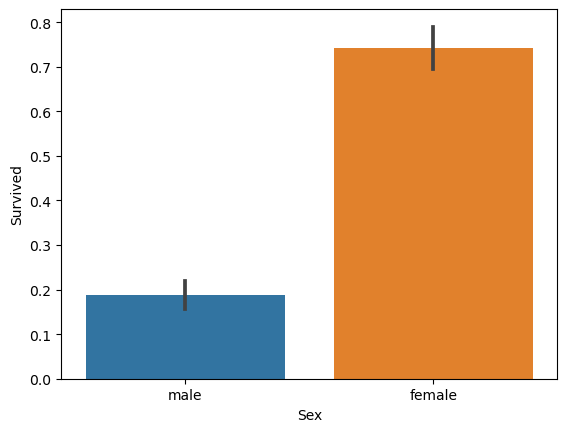

In [24]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

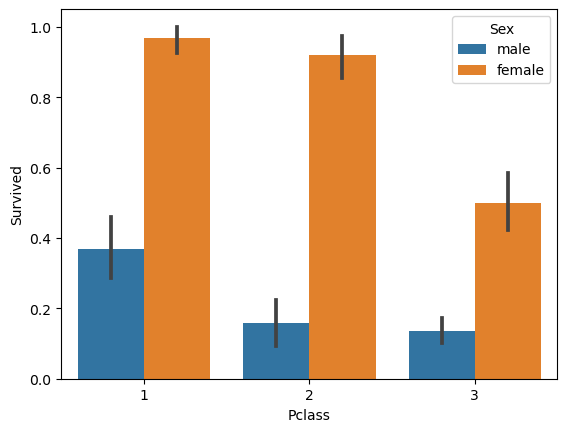

In [25]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

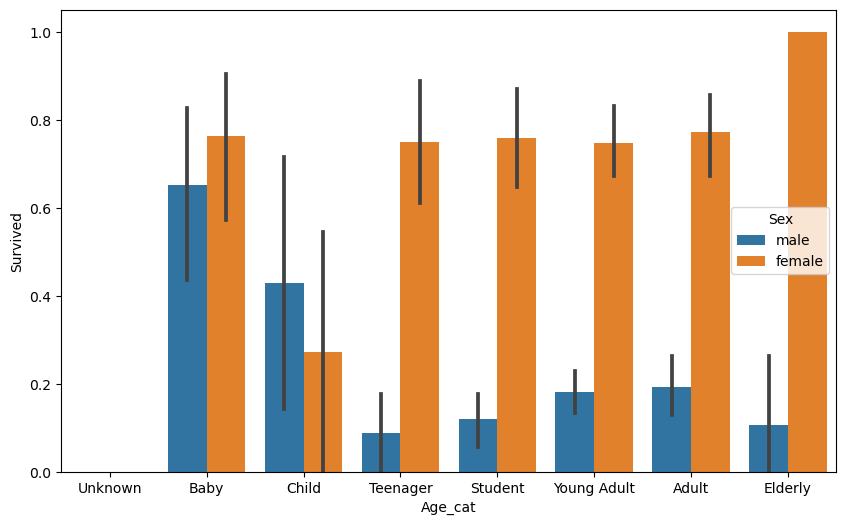

In [26]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

=> **Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 피처임을 어느 정도 확인**

남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- 인코딩은 LabelEncoder 클래스 이용해 레이블 인코딩 적용 [ 0 ~ (카테고리 유형 수-1)까지의 숫자 값으로 변환 ]

In [27]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [28]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 생성. 그리고 Survived 속성을 드롭해 피처 데이터 세트 생성.

In [31]:
# 원본 데이터를 재로딩 하고, 피처 데이터 세트와 레이블 데이터 세트 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

# 원본 데이터 가공
X_titanic_df = transform_features(X_titanic_df)

In [32]:
# 테스트 데이터 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# DecisionTree, Random Forest, LogisticRegression를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [34]:
# KFold를 이용한 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [35]:
# cross_val_score를 이용한 교차 검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores))) 

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [36]:
# GridSearchCV를 이용한 DecisionTreeClassifier의 최적 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
